In [2]:
%pip install networkx matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


1. Create Basic Graphs

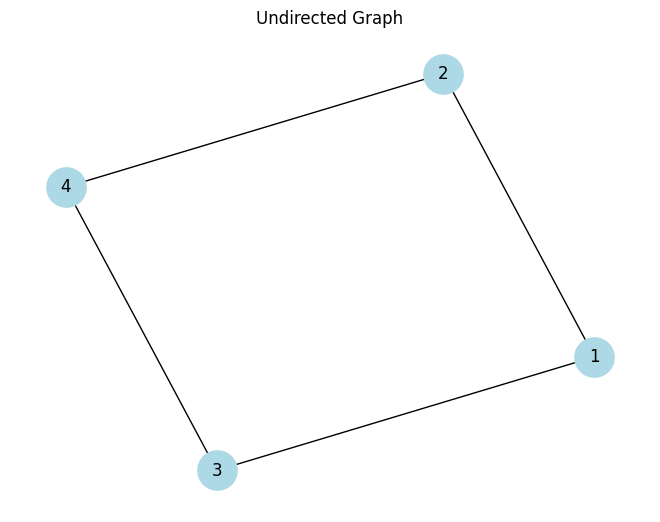

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a simple undirected graph
G = nx.Graph()
# Add nodes and edges
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
# Visualize
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800)
plt.title("Undirected Graph")
plt.show()

2. Analyze Basic Properties

In [4]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())
print("Degree of each node:", dict(G.degree()))
print("Number of connected components:", nx.number_connected_components(G))
print("Shortest path from node 1 to 4:", nx.shortest_path(G, 1, 4))

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 3), (2, 4), (3, 4)]
Degree of each node: {1: 2, 2: 2, 3: 2, 4: 2}
Number of connected components: 1
Shortest path from node 1 to 4: [1, 2, 4]


3. Directed and Weighted Graphs

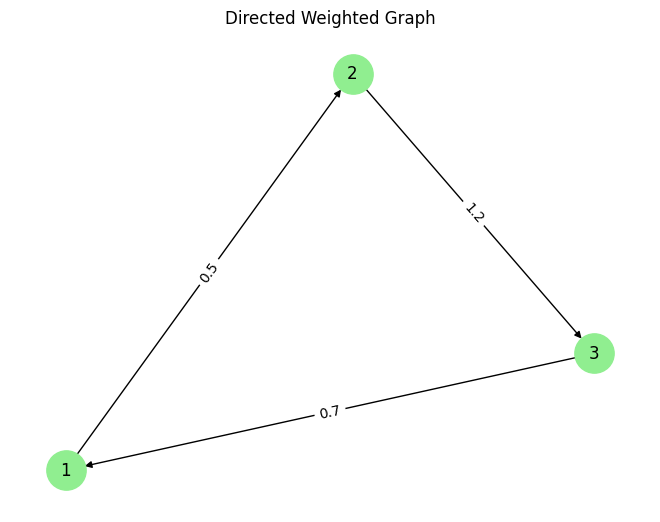

In [5]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (2, 3, 1.2), (3, 1, 0.7)])
# Draw with edge weights
pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_color='lightgreen', node_size=800, arrows=True)
labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels)
plt.title("Directed Weighted Graph")
plt.show()

4. Real-World Graph: Karate Club

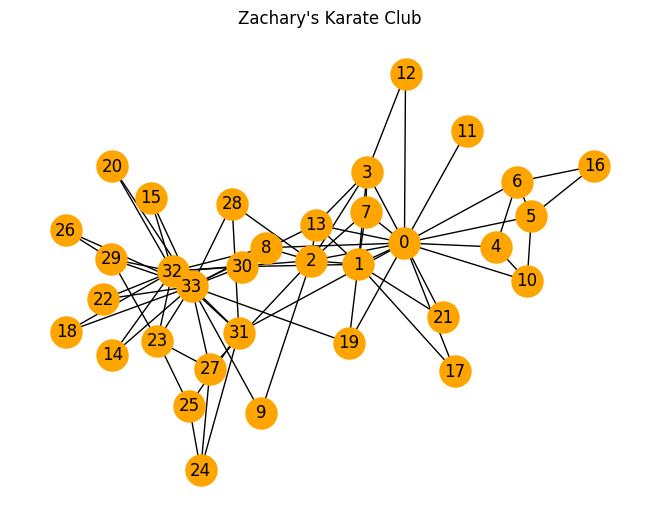

Number of nodes: 34
Number of edges: 78


In [7]:
karate = nx.karate_club_graph()
nx.draw(karate, with_labels=True, node_color='orange', node_size=500)
plt.title("Zachary's Karate Club")
plt.show()
print("Number of nodes:", karate.number_of_nodes())
print("Number of edges:", karate.number_of_edges())

Advanced Computation on Complex Graphs

1. Degree Distribution

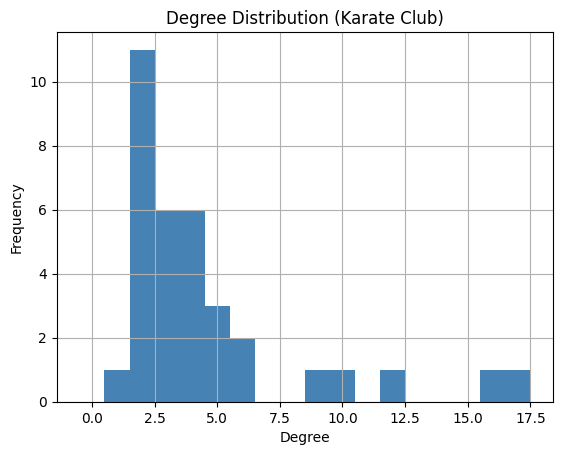

In [8]:
import numpy as np
degrees = [deg for node, deg in karate.degree()]
plt.hist(degrees, bins=np.arange(0, max(degrees)+2)-0.5, color='steelblue')
plt.title("Degree Distribution (Karate Club)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

2. Clustering Coefficient

In [9]:
avg_clustering = nx.average_clustering(karate)
print("Average Clustering Coefficient:", avg_clustering)
# Clustering for each node
clustering_dict = nx.clustering(karate)
print("Clustering of node 0:", clustering_dict[0])

print("Độ co cụm phản ánh sự không đồng đều")

Average Clustering Coefficient: 0.5706384782076823
Clustering of node 0: 0.15
Độ co cụm phản ánh sự không đồng đều


3. Path Lengths and Diameter

In [10]:
lengths = dict(nx.all_pairs_shortest_path_length(karate))
print("Shortest path length from node 0 to 33:", lengths[0][33])
diameter = nx.diameter(karate)
print("Diameter of the network:", diameter)
avg_path_length = nx.average_shortest_path_length(karate)
print("Average shortest path length:", avg_path_length)

Shortest path length from node 0 to 33: 2
Diameter of the network: 5
Average shortest path length: 2.408199643493761


4. Centrality Measures

In [11]:
deg_cent = nx.degree_centrality(karate)
close_cent = nx.closeness_centrality(karate)
bet_cent = nx.betweenness_centrality(karate)
eig_cent = nx.eigenvector_centrality(karate)
# Top 3 nodes by each measure
def top3(metric):
 return sorted(metric.items(), key=lambda x: x[1], reverse=True)[:3]
print("Top 3 by Degree Centrality:", top3(deg_cent))
print("Top 3 by Closeness Centrality:", top3(close_cent))
print("Top 3 by Betweenness Centrality:", top3(bet_cent))
print("Top 3 by Eigenvector Centrality:", top3(eig_cent))

Top 3 by Degree Centrality: [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365)]
Top 3 by Closeness Centrality: [(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55)]
Top 3 by Betweenness Centrality: [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114)]
Top 3 by Eigenvector Centrality: [(33, 0.37337121301323506), (0, 0.35548349418519426), (2, 0.3171893899684447)]


5. Visualize Centrality

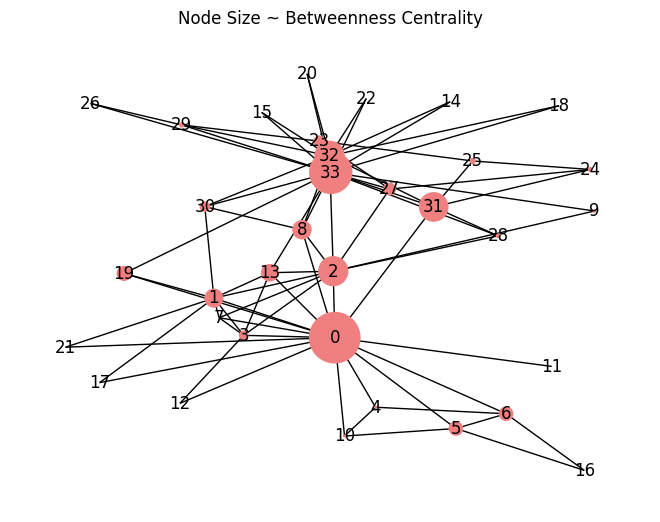

In [12]:
node_size = [v * 3000 for v in bet_cent.values()]
nx.draw(karate, node_size=node_size, with_labels=True, node_color='lightcoral')
plt.title("Node Size ~ Betweenness Centrality")
plt.show()

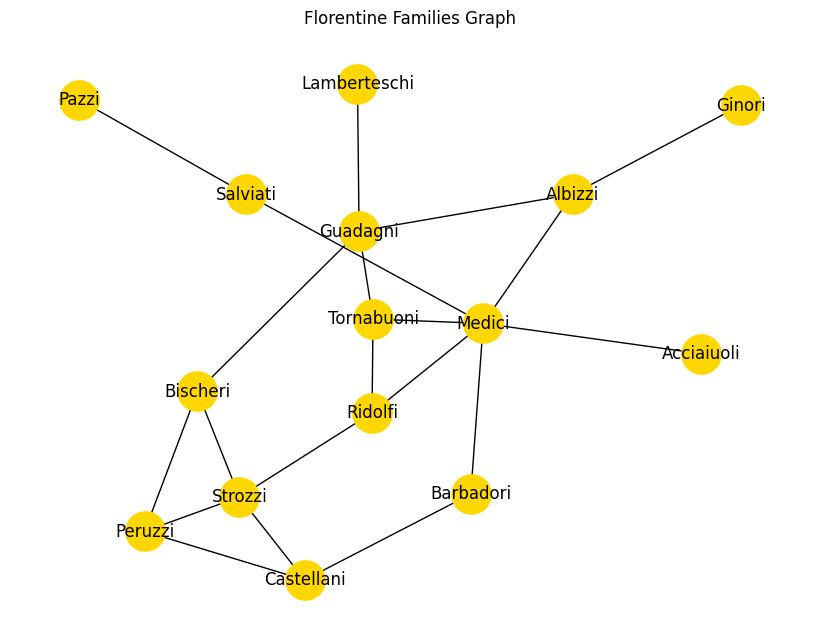

Number of nodes: 15
Number of edges: 20


In [13]:
# Load the Florentine Families graph
florentine = nx.florentine_families_graph()

# Visualize the graph
plt.figure(figsize=(8, 6)) # Adjust figure size for better viewing
nx.draw(florentine, with_labels=True, node_color='gold', node_size=800)
plt.title("Florentine Families Graph")
plt.show()

# Print some basic information about the graph
print("Number of nodes:", florentine.number_of_nodes())
print("Number of edges:", florentine.number_of_edges())

In [24]:

deg_cent = nx.degree_centrality(florentine)
close_cent = nx.closeness_centrality(florentine)
bet_cent = nx.betweenness_centrality(florentine)
eig_cent = nx.eigenvector_centrality(florentine)
def top_n_ranking(metric, n=5):
  # Sort items by value in descending order and take the top N
  sorted_nodes = sorted(metric.items(), key=lambda x: x[1], reverse=True)[:n]
  # Extract just the node list (excluding the value for cleaner comparison)
  return [node for node, value in sorted_nodes]

# Get top 5 nodes for each centrality measure
top5_degree = top_n_ranking(deg_cent, n=5)
top5_closeness = top_n_ranking(close_cent, n=5)
top5_betweenness = top_n_ranking(bet_cent, n=5)
top5_eigenvector = top_n_ranking(eig_cent, n=5)

# Print and compare the rankings
print("Top 5 by Degree Centrality:", top5_degree)
print("Top 5 by Closeness Centrality:", top5_closeness)
print("Top 5 by Betweenness Centrality:", top5_betweenness)
print("Top 5 by Eigenvector Centrality:", top5_eigenvector)


Top 5 by Degree Centrality: ['Medici', 'Strozzi', 'Guadagni', 'Castellani', 'Peruzzi']
Top 5 by Closeness Centrality: ['Medici', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Guadagni']
Top 5 by Betweenness Centrality: ['Medici', 'Guadagni', 'Albizzi', 'Salviati', 'Ridolfi']
Top 5 by Eigenvector Centrality: ['Medici', 'Strozzi', 'Ridolfi', 'Tornabuoni', 'Guadagni']


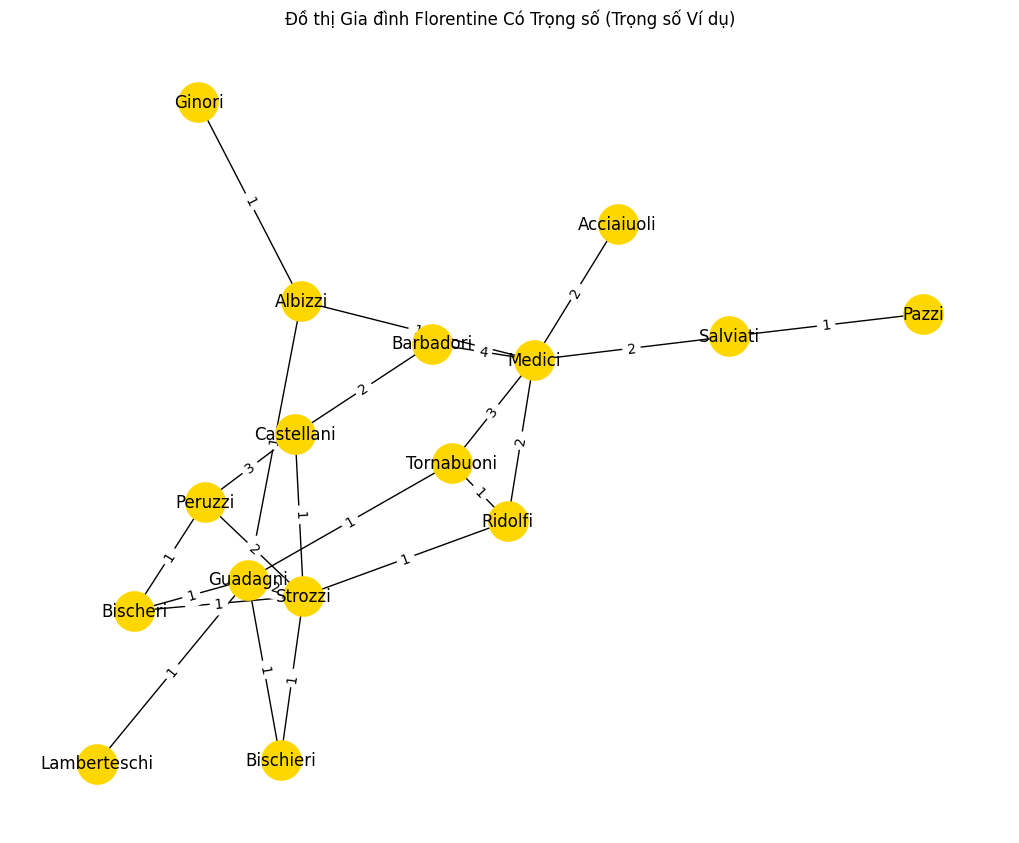

Bậc Có Trọng số: {'Acciaiuoli': 2, 'Medici': 14, 'Castellani': 6, 'Peruzzi': 6, 'Strozzi': 8, 'Barbadori': 6, 'Ridolfi': 4, 'Tornabuoni': 5, 'Albizzi': 3, 'Salviati': 3, 'Pazzi': 1, 'Bischeri': 3, 'Guadagni': 7, 'Ginori': 1, 'Lamberteschi': 1, 'Bischieri': 2}

Độ đo Trung tâm Gần gũi (Có Trọng số): {'Acciaiuoli': 0.21739130434782608, 'Medici': 0.36585365853658536, 'Castellani': 0.2777777777777778, 'Peruzzi': 0.2727272727272727, 'Strozzi': 0.35714285714285715, 'Barbadori': 0.20833333333333334, 'Ridolfi': 0.35714285714285715, 'Tornabuoni': 0.3333333333333333, 'Albizzi': 0.38461538461538464, 'Salviati': 0.23076923076923078, 'Pazzi': 0.189873417721519, 'Bischeri': 0.36585365853658536, 'Guadagni': 0.4166666666666667, 'Ginori': 0.2830188679245283, 'Lamberteschi': 0.3, 'Bischieri': 0.3488372093023256}

Độ đo Trung tâm Trung gian (Có Trọng số): {'Acciaiuoli': 0.0, 'Medici': 0.39047619047619053, 'Castellani': 0.0761904761904762, 'Peruzzi': 0.0, 'Strozzi': 0.2238095238095238, 'Barbadori': 0.0, '

In [15]:
# Try directed or weighted versions
import networkx as nx
import matplotlib.pyplot as plt

# Tải đồ thị gốc không có hướng, không có trọng số
florentine_undirected = nx.florentine_families_graph()

# Tạo một đồ thị mới sẽ có trọng số (và có thể có hướng nếu cần)
# Hãy tạo một phiên bản có trọng số để minh họa
florentine_weighted = nx.Graph() # Sử dụng nx.DiGraph() cho đồ thị có hướng

# Thêm các nút từ đồ thị gốc
florentine_weighted.add_nodes_from(florentine_undirected.nodes())

# Thêm các cạnh với trọng số tùy ý để minh họa
# Trong một kịch bản thực tế, bạn sẽ tải trọng số từ một tập dữ liệu
weighted_edges = [
    ('Acciaiuoli', 'Medici', 2),
    ('Castellani', 'Peruzzi', 3),
    ('Castellani', 'Strozzi', 1),
    ('Castellani', 'Barbadori', 2),
    ('Medici', 'Barbadori', 4),
    ('Medici', 'Ridolfi', 2),
    ('Medici', 'Tornabuoni', 3),
    ('Medici', 'Albizzi', 1),
    ('Medici', 'Salviati', 2),
    ('Salviati', 'Pazzi', 1),
    ('Peruzzi', 'Strozzi', 2),
    ('Ridolfi', 'Strozzi', 1),
    ('Ridolfi', 'Tornabuoni', 1),
    ('Strozzi', 'Bischieri', 1),
    ('Strozzi', 'Guadagni', 2),
    ('Bischieri', 'Guadagni', 1),
    ('Guadagni', 'Tornabuoni', 1)
    # Thêm các cạnh khác với trọng số nếu cần dựa trên cấu trúc đồ thị gốc
    # Đảm bảo bao gồm tất cả các cạnh trong đồ thị gốc với trọng số được gán
]

# Thêm các cạnh có trọng số vào đồ thị mới
florentine_weighted.add_weighted_edges_from(weighted_edges)

# Bạn có thể cần đảm bảo tất cả các nút và cạnh gốc đều được bao gồm,
# ngay cả khi trọng số của chúng ngầm định là 1 trong đồ thị gốc.
# Đối với các cạnh không có trong weighted_edges một cách rõ ràng, bạn có thể thêm chúng với trọng số mặc định.
original_edges = list(florentine_undirected.edges())
for u, v in original_edges:
    if not florentine_weighted.has_edge(u, v):
        # Thêm các cạnh bị thiếu với trọng số mặc định, ví dụ: 1
        florentine_weighted.add_edge(u, v, weight=1)


# Trực quan hóa đồ thị có trọng số với trọng số cạnh
pos = nx.spring_layout(florentine_weighted, seed=42) # Sử dụng một layout
plt.figure(figsize=(10, 8))
nx.draw(florentine_weighted, pos, with_labels=True, node_color='gold', node_size=800)
labels = nx.get_edge_attributes(florentine_weighted, 'weight')
nx.draw_networkx_edge_labels(florentine_weighted, pos, edge_labels=labels)
plt.title("Đồ thị Gia đình Florentine Có Trọng số (Trọng số Ví dụ)")
plt.show()


deg_cent_w = nx.degree_centrality(florentine_weighted) # Độ đo trung tâm bậc trên đồ thị có trọng số xem xét trọng số nếu được chỉ định trong hàm
# Đối với độ đo trung tâm bậc với trọng số, networkx có một hàm cụ thể:
weighted_degree = dict(florentine_weighted.degree(weight='weight'))
print("Bậc Có Trọng số:", weighted_degree)

# Độ đo trung tâm gần gũi trên đồ thị có trọng số sử dụng trọng số cạnh cho độ dài đường đi
close_cent_w = nx.closeness_centrality(florentine_weighted, distance='weight')
print("\nĐộ đo Trung tâm Gần gũi (Có Trọng số):", close_cent_w)

# Độ đo trung tâm trung gian trên đồ thị có trọng số sử dụng trọng số cạnh cho đường đi ngắn nhất
bet_cent_w = nx.betweenness_centrality(florentine_weighted, weight='weight')
print("\nĐộ đo Trung tâm Trung gian (Có Trọng số):", bet_cent_w)

# Độ đo trung tâm eigenvector (kiểm tra tài liệu để biết cách diễn giải trọng số)
eig_cent_w = nx.eigenvector_centrality(florentine_weighted, weight='weight')
print("\nĐộ đo Trung tâm Eigenvector (Có Trọng số):", eig_cent_w) # Bỏ bình luận để chạy

Challenge: Generate a random graph (Erdős–Rényi) and compare its metrics with
Karate Club

Karate Club - Nodes: 34, Edges: 78
Estimated probability for equivalent random graph: 0.1390
Generated Random Graph - Nodes: 34, Edges: 73


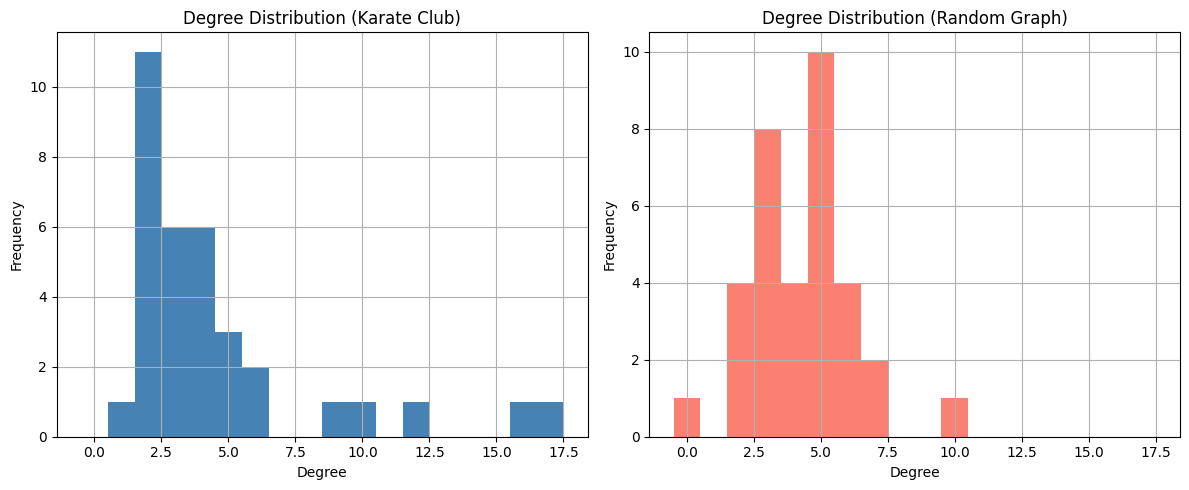


Average Clustering Coefficient - Karate Club: 0.5706
Average Clustering Coefficient - Random Graph: 0.1082

--- Average Shortest Path Length ---
Average Shortest Path Length - Karate Club: 2.4082
Random Graph is disconnected, cannot compute average shortest path length.

Max Betweenness Centrality - Karate Club: 0.4376
Max Betweenness Centrality - Random Graph: 0.1949


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Lấy thông tin từ đồ thị Câu lạc bộ Karate
karate = nx.karate_club_graph()
n_karate = karate.number_of_nodes()
m_karate = karate.number_of_edges()
print(f"Câu lạc bộ Karate - Số nút: {n_karate}, Số cạnh: {m_karate}")

# Ước tính xác suất p cho đồ thị ngẫu nhiên dựa trên số lượng cạnh
# Đối với một đồ thị ngẫu nhiên có n nút, số cạnh tối đa có thể là n*(n-1)/2
# Vậy, m = p * n*(n-1)/2  =>  p = m / (n*(n-1)/2)
# Thêm một epsilon nhỏ vào p để tăng nhẹ khả năng kết nối,
# hoặc giữ nguyên để so sánh số lượng cạnh trực tiếp hơn (có thể dẫn đến mất kết nối)
p_karate = m_karate / (n_karate * (n_karate - 1) / 2)
print(f"Xác suất ước tính cho đồ thị ngẫu nhiên tương đương: {p_karate:.4f}")


# 2. Tạo một đồ thị ngẫu nhiên (mô hình Erdős–Rényi G(n,p))
# Chúng ta sẽ sử dụng xác suất p đã ước tính
random_graph = nx.erdos_renyi_graph(n_karate, p_karate)
print(f"Đồ thị Ngẫu nhiên Được tạo - Số nút: {random_graph.number_of_nodes()}, Số cạnh: {random_graph.number_of_edges()}")
# Lưu ý: Số lượng cạnh trong đồ thị ngẫu nhiên sẽ gần bằng m_karate, nhưng có thể không hoàn toàn giống do tính chất xác suất.


# 3. Tính toán các số liệu cho cả hai đồ thị

# Phân phối bậc
degrees_karate = [deg for node, deg in karate.degree()]
degrees_random = [deg for node, deg in random_graph.degree()]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(degrees_karate, bins=np.arange(0, max(max(degrees_karate), max(degrees_random))+2)-0.5, color='steelblue')
plt.title("Phân phối Bậc (Câu lạc bộ Karate)")
plt.xlabel("Bậc")
plt.ylabel("Tần suất")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(degrees_random, bins=np.arange(0, max(max(degrees_karate), max(degrees_random))+2)-0.5, color='salmon')
plt.title("Phân phối Bậc (Đồ thị Ngẫu nhiên)")
plt.xlabel("Bậc")
plt.ylabel("Tần suất")
plt.grid(True)

plt.tight_layout()
plt.show()

# Hệ số cụm trung bình
avg_clustering_karate = nx.average_clustering(karate)
avg_clustering_random = nx.average_clustering(random_graph)

print(f"\nHệ số Cụm Trung bình - Câu lạc bộ Karate: {avg_clustering_karate:.4f}")
print(f"Hệ số Cụm Trung bình - Đồ thị Ngẫu nhiên: {avg_clustering_random:.4f}")

# Độ dài đường đi ngắn nhất trung bình (Yêu cầu đồ thị phải được kết nối)
# SỬA LỖI: Kiểm tra tính kết nối trước khi tính toán
print("\n--- Độ dài Đường đi Ngắn nhất Trung bình ---")
if nx.is_connected(karate):
    try:
        avg_path_karate = nx.average_shortest_path_length(karate)
        print(f"Độ dài Đường đi Ngắn nhất Trung bình - Câu lạc bộ Karate: {avg_path_karate:.4f}")
    except nx.NetworkXNoPath:
         print("Câu lạc bộ Karate bị mất kết nối, không thể tính toán độ dài đường đi ngắn nhất trung bình.")
else:
    print("Câu lạc bộ Karate bị mất kết nối, không thể tính toán độ dài đường đi ngắn nhất trung bình.")


if nx.is_connected(random_graph):
    try:
        avg_path_random = nx.average_shortest_path_length(random_graph)
        print(f"Độ dài Đường đi Ngắn nhất Trung bình - Đồ thị Ngẫu nhiên: {avg_path_random:.4f}")
    except nx.NetworkXNoPath:
        # Điều này không nên xảy ra nếu is_connected là True, nhưng được bao gồm để đảm bảo tính mạnh mẽ
        print("Đồ thị Ngẫu nhiên bị mất kết nối, không thể tính toán độ dài đường đi ngắn nhất trung bình.")
else:
    print("Đồ thị Ngẫu nhiên bị mất kết nối, không thể tính toán độ dài đường đi ngắn nhất trung bình.")


# Độ đo Trung tâm (ví dụ: Độ đo Trung tâm Trung gian của một vài nút)
# Ít quan trọng việc so sánh các nút cụ thể hơn là so sánh sự phân phối của các giá trị
bet_cent_karate = nx.betweenness_centrality(karate)
bet_cent_random = nx.betweenness_centrality(random_graph)

# In các giá trị lớn nhất để so sánh đơn giản
print(f"\nĐộ đo Trung tâm Trung gian Lớn nhất - Câu lạc bộ Karate: {max(bet_cent_karate.values()):.4f}")
print(f"Độ đo Trung tâm Trung gian Lớn nhất - Đồ thị Ngẫu nhiên: {max(bet_cent_random.values()):.4f}")

# Lưu ý: Để so sánh sự phân phối độ đo trung tâm một cách chặt chẽ hơn,
# bạn có thể vẽ biểu đồ tần suất của các giá trị độ đo trung tâm cho cả hai đồ thị.

# 4. So sánh (Các quan sát từ kết quả đầu ra)
# - Phân phối Bậc: Đồ thị ngẫu nhiên có xu hướng có phân phối bậc hẹp xung quanh bậc trung bình.
#   Các mạng trong thế giới thực như Câu lạc bộ Karate thường có phân phối lệch hơn (một vài nút có bậc rất cao).
# - Hệ số Cụm Trung bình: Các mạng trong thế giới thực thường có hệ số cụm trung bình cao hơn nhiều
#   so với đồ thị ngẫu nhiên có cùng số lượng nút và cạnh. Điều này phản ánh sự hiện diện của nhiều tam giác
#   (bạn của bạn cũng là bạn) trong các mạng xã hội.
# - Độ dài Đường đi Ngắn nhất Trung bình: Cả hai loại mạng đều có thể thể hiện hiện tượng "thế giới nhỏ"
#   (độ dài đường đi trung bình tương đối ngắn). Tuy nhiên, sự tương tác với hệ số cụm là yếu tố chính.
# - Độ đo Trung tâm: Sự phân phối và phạm vi của các giá trị độ đo trung tâm có thể khác nhau,
#   phản ánh các thuộc tính cấu trúc khác nhau và sự hiện diện của các nút có ảnh hưởng.